Set parameter Username
Set parameter LicenseID to value 2621594
Academic license - for non-commercial use only - expires 2026-02-13
Gurobi Optimizer version 12.0.1 build v12.0.1rc0 (win64 - Windows 11.0 (26100.2))

CPU model: AMD Ryzen 7 5800H with Radeon Graphics, instruction set [SSE2|AVX|AVX2]
Thread count: 8 physical cores, 16 logical processors, using up to 16 threads

Optimize a model with 21 rows, 25 columns and 104 nonzeros
Model fingerprint: 0x5b41bb6a
Variable types: 0 continuous, 25 integer (25 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 5e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 16.0000000
Presolve removed 1 rows and 5 columns
Presolve time: 0.00s
Presolved: 20 rows, 20 columns, 100 nonzeros
Variable types: 0 continuous, 20 integer (20 binary)

Root relaxation: objective 1.100000e+01, 11 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current No

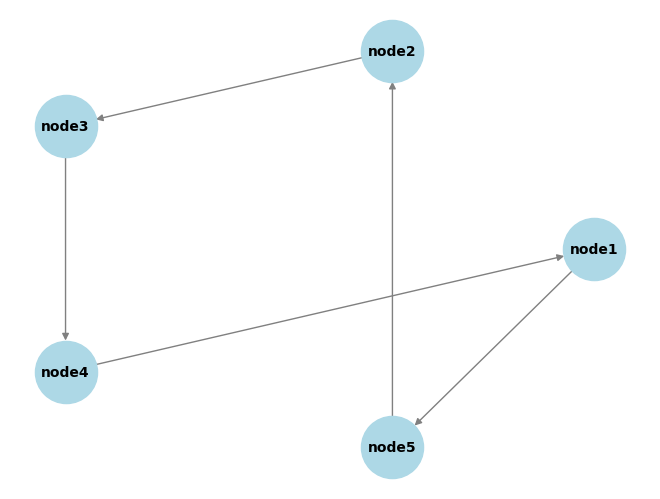

In [3]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 20 10:53:00 2025

@author: 1119f
"""

from gurobipy import Model, GRB
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt

## Parameters and sets
##*****************************************************
n = 5

nodes = [f"node{i}" for i in range(1,n+1)]

## Distance matrix
# 1 2 3 4 5
d = [
     [0,2,3,2,3], # 1
     [2,0,3,4,1], # 2
     [3,3,0,2,4], # 3
     [2,4,2,0,5], # 4
     [3,1,4,5,0]  # 5
     ]

## Model
##*****************************************************

## 1, Begin Optimization
model = Model("Optimization_Model")

## Variables

x = model.addVars(n,n,vtype=GRB.BINARY,name="x")

## Objective function
model.setObjective(sum(d[i][j]*x[i,j] for i in range(n) for j in range(n) if i != j),GRB.MINIMIZE)

## Constraints
# Each city must be visited exactly once

for j in range(n):
    model.addConstr(sum(x[i,j] for i in range(n) if i != j) == 1)
    
for i in range(n):
    model.addConstr(sum(x[i,j] for j in range(n) if i != j) == 1)

# Subtour elimination
for s in range(2,n):
    for S in combinations(range(1,n),s):
        S_compliment = [i for i in range(n) if i not in S]
        model.addConstr(sum(x[i,j] for i in S for j in S_compliment) >= 1)

# Solve the model

model.optimize()

G = nx.DiGraph()
for i in range(n):
    G.add_node(nodes[i])

# Output resultes
if model.Status == GRB.OPTIMAL:
    print("Optimal Route:")
    for i in range(n):
        for j in range(n):
            if x[i,j].x > 0.0:
                print(f"{nodes[i]} -> {nodes[j]}")
                G.add_edge(nodes[i], nodes[j])

else:
    print("No solution found")
    
pos = nx.circular_layout(G)
nx.draw(G,pos,with_labels=True,node_size=2000,node_color="Lightblue",font_size=10, font_weight="bold",edge_color="grey")
plt.show()